<a href="https://colab.research.google.com/github/gabridulol/nn-and-dl/blob/main/pa4_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P4: Recurrent Neural Networks**

### **Introduction**
In this practical project, you will implement a recurrent neural network (RNN) in PyTorch to generate Pokemon names using a character-level language model. First, you will create a class to load the dataset. Second, you will build a traditional RNN. Third, you will train this network using mini-batch gradient descent. Finally, you will use the trained model to generate new Pokemon names.

### **Objective**

The main objective of this project is to practice implementing RNNs in PyTorch, including dataset loading, implementing custom layers, training with gradient descent, and generating with language models.

### **Instructions**

After each cell of this type, there is a test cell followed by expected results, so you can check if your solution is correct. Your results might be slightly diferent from the expected results and still be correct.

### **Part 0: Import libraries**

As in the previous programming, you will import the `torch` library and other  auxiliary libraries.

In [ ]:
import torch
import sys
import random

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### **Part 1: Loading and preprocessing the dataset**

In this first part, you will download the dataset as a txt file (pokemons.txt), which contains names of 890 Pokemon created from the first to the eighth generation of the series. Each name is separated by a \n character.

In [ ]:
!wget -O 'pokemons.txt' 'https://ufv-inf721.lucasnferreira.com/static_files/datasets/p5-rnn/pokemons.txt'

--2025-05-07 11:48:49--  https://ufv-inf721.lucasnferreira.com/static_files/datasets/p5-rnn/pokemons.txt
Resolving ufv-inf721.lucasnferreira.com (ufv-inf721.lucasnferreira.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to ufv-inf721.lucasnferreira.com (ufv-inf721.lucasnferreira.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7602 (7.4K) [text/plain]
Saving to: ‘pokemons.txt’

pokemons.txt        100%[===================>]   7.42K  --.-KB/s    in 0s      

2025-05-07 11:48:50 (69.6 MB/s) - ‘pokemons.txt’ saved [7602/7602]



#### **1.1 Download data and create vocabulary**

Read the 'pokemons.txt' file to load all pokemon names from Generation 1 through Generation 8 in a list and produce the train/test sets randomly using a 80/20 split. Moreover, create a vocabulary (list) with all the characters in the text file sorted alphabetically. Make sure to include three extra control characters in your vocabulary: '[' (SOS), ']' (EOS), '@' (padding)

In [ ]:
random.seed(42)

# Read names
file_path = "pokemons.txt"

# Shuffle names

# Randomly split the dataset using a 80/20 split
train_text = []
test_text = []

# Create vocabulary from raw_text
vocab = []

print("First 5 training examples:", train_text[:5])
print("First 5 test examples:", test_text[:5])
print("First 10 characters of vocabulary:", vocab[:10])
print("Vocabulary size", len(vocab))

First 5 training examples: []
First 5 test examples: []
First 10 characters of vocabulary: []
Vocabulary size 0


**Expected result**:

<table style="width:50%">
  <tr>
    <td> First 5 training examples </td>
    <td>['Shellos', 'Haunter', 'Ninjask', 'Snover', 'Araquanid']</td>
  </tr>
  <tr>
    <td> First 5 test examples </td>
    <td>['Pansear', 'Dracovish', 'Charmander', 'Zeraora', 'Furret']</td>
  </tr>
  <tr>
    <td> First 10 characters of vocabulary </td>
    <td>['\n', ' ', "'", '-', '.', '2', ':', '@', 'A', 'B']</td>
  </tr>
    <tr>
    <td> Vocabulary Size </td>
    <td> 65</td>
  </tr>
</table>

#### **1.2 Create a Dataset class to store the dataset**

PyTorch provides the [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class for loading datasets from files. To create a custom dataset, you need to extend the Dataset class and implement three functions: `__init__`, `__len__`, and `__getitem__`. In this step, you will implement these three functions and some auxiliary ones to build a dataset for your Pokemon names language model.

- `__init__`:
  Initialize the dataset by creating attributes to store the names and the vocab. Add SOS/EOS tokens to each name before storing them. Morever, create mappings between characters and indices and vice versa. It is also useful to compute and store the max len of a word in the dataset.

- `one_hot_encode(ix)`:
  Create a one-hot encoded tensor for a given index.

- `encode(seq_ch)`:
  Convert a sequence of characters into a tensor of one-hot vectors.

- `decode(seq_ix)`:
  Convert a sequence of indices back into a string of characters.

- `__len__`:
  Return the total number of sequences in the dataset.

- `__getitem__(index)`:
  Process a single Pokemon name by padding (with @) to match the longest sequence length, and returning input-output tensor pairs. Use `torch.tensor()` to convert the output sequence to a tensor.

Remember that for language modeling, your input sequences (`x`) should be shifted by one character relative to your target sequences (`y`), allowing the model to predict the next character in the sequence.

In [ ]:
class INF721Dataset(Dataset):
    def __init__(self, names, vocab):
      # create vocabulary of chars
      self.vocab = vocab
      self.ch2ix = { }
      self.ix2ch = { }

      # create samples
      self.sequences = []
      self.max_len = 0

    def one_hot_encode(self, ix):
      """
      Create a one-hot encoded tensor for a given index.

      Args:
          ix (int): The index to encode.

      Returns:
          torch.Tensor: A one-hot encoded tensor of shape (vocab_size).
      """
      pass

    def encode(self, seq_ch):
      """
      Convert a sequence of characters into a tensor of one-hot vectors.

      Args:
          seq_ch (str): A string representing the sequence of characters to encode.

      Returns:
          torch.Tensor: A tensor of one-hot vectors representing the input sequence.
      """
      pass

    def decode(self, seq_ix):
      """
      Convert a sequence of indices back into a string of characters.

      Args:
          seq_ix (list): A list of indices representing the characters in the sequence.

      Returns:
          str: The decoded string of characters.
      """
      pass

    def __len__(self):
      """
      Get the total number of sequences in the dataset.

      Returns:
          int: The total number of sequences in the dataset.
      """
      pass

    def __getitem__(self, index):
      """
      Get a single sample from the dataset.

      Args:
          index (int): Index of the sample to retrieve.

      Returns:
          tuple: A tuple containing the input tensor x and the target tensor y.
      """
      pass

    @property
    def vocab_size(self):
      """
      Get the size of the vocabulary.

      Returns:
          int: The size of the vocabulary.
      """
      return len(self.vocab)

In [ ]:
train_dataset = INF721Dataset(train_text, vocab)
test_dataset = INF721Dataset(test_text, vocab)

print("Train vocabulary size:", train_dataset.vocab_size)
print("Test vocabulary size:", test_dataset.vocab_size)

print("Train max sequence length:", train_dataset.max_len)
print("Test max sequence length:", test_dataset.max_len)

print("Train dataset size:", len(train_dataset))
print("Test dataset size:", len(test_dataset))

**Expected result**:

<table style="width:50%">
  <tr>
    <td> Train vocabulary size </td>
    <td>65</td>
  </tr>
  <tr>
    <td> Test vocabulary size </td>
    <td>65</td>
  </tr>
  <tr>
    <td> Train max sequence length </td>
    <td>14</td>
  </tr>
  <tr>
    <td> Test max sequence length </td>
    <td>13</td>
  </tr>
  <tr>
    <td> Train dataset size </td>
    <td>712</td>
  </tr>
    <tr>
    <td> Test dataset size </td>
    <td>178</td>
  </tr>
</table>

#### **1.3 Visualization of examples**

If you loaded the data correctly, you can use the code below to visualize examples from the dataset.

In [ ]:
x = train_dataset.sequences[0]
x_encoded, y = train_dataset[0]
print("x0", x)
print("x0_encoded size", x_encoded.size())
print("y", y)

**Expected result**:

<table style="width:50%">
  <tr>
    <td>x0</td>
    <td>[Shellos]</td>
  </tr>
  <tr>
    <td>x0 encoded size</td>
    <td>[13, 65]</td>
  </tr>
  <tr>
    <td> y </td>
    <td>[26, 43, 40, 47, 47, 50, 54, 35,  7,  7,  7,  7,  7]</td>
  </tr>
</table>

#### **1.4 Create a DataLoader to iterate through examples**

 Create a `train_loader` and a `test_loader` using PyTorch's [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training and test set. Configure both of them with:
- batch_size = 32
- drop_last = True (to remove the last potentially incomplete minibatch)

Make sure to set shuffle parameter to True in your training data loader. You don't need to shuffle the test data loader.


In [ ]:
# Create training data loader
train_loader = None

# Create test data loader
test_loader = None

In [ ]:
torch.manual_seed(1)

# Assuming the variable train_loader have been defined in the previous cell.
train_x_batch, train_y_batch = next(iter(train_loader))
test_x_batch, test_y_batch = next(iter(test_loader))

print("A single training batch size: ", train_x_batch.size())
print("A single test batch size: ", test_x_batch.size())

print("Train Sanity check: ", train_x_batch[0][1])
print("Test Sanity check: ", test_x_batch[0][1])

**Expected result**:

<table style="width:50%">
  <tr>
    <td> Single training batch size </td>
    <td>[32, 13, 65]</td>
  </tr>
  <td> Single test batch size </td>
    <td>[32, 12, 65]</td>
  </tr>
  <tr>
    <td> Train Sanity check </td>
    <td>[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    </td>
  </tr>
    <tr>
    <td> Test Sanity check </td>
    <td>[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
    </td>
  </tr>
</table>

## **Part 2: Recurrent Neural Network**

Now that you have a dataset ready for training, it's time to create your RNN.

#### **2.1 Recurrent Hidden Layer**

The first step to create your RNN is to implement a class that extends `torch.nn.Module` with `__init__` to initialize the RNN weights and `forward(x)` for input propagation.

- Weight initialization (`__init__`):
  Use [`torch.nn.Parameter`](https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html) to initialize the RNN weights:
  - `self.Wx`: input weights
  - `self.Wh`: hidden state weights
  - `self.b`: bias
  
  Initialize weights with small random values (`torch.randn * 0.01`) and bias with zeros (`torch.zeros`).

- Forward propagation (`forward(x)`):
  Implement the RNN forward pass (for the hidden layear only) following this equation:

  \begin{align}
    h^{<t>} &= tanh(W_{h} h^{<t-1>} + W_{x}x^{<t>} + b) \\
  \end{align}
  where:
  - x_t is the input at time t
  - h_t is the hidden state at time t
  - Wx, Wh, and b are the learnable parameters

  Remember to:
  1. Handle the initial hidden state case
  2. Process input sequence from left to right
  3. Use `torch.cat` to combine hidden states
  4. Use `permute` to arrange the output tensor in the format (batch_size, seq_len, hidden_size)

In [ ]:
class INF721RNNLayer(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        """
        Initialize the RNN layer.

        Args:
            input_size (int): The number of expected features in the input x.
            hidden_size (int): The number of features in the hidden state h.
        """
        super(INF721RNNLayer, self).__init__()
        pass

    def forward(self, x, h_prev):
        """
        Forward pass of the entire RNN.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, sequence_length, input_size).
            h_prev (torch.Tensor): Initial hidden state tensor of shape (batch_size, hidden_size).

        Returns:
            outputs (torch.Tensor): Sequence
            h_t: The final hidden state after processing the entire sequence x.
        """
        pass

In [ ]:
torch.manual_seed(1)

rnn_layer = INF721RNNLayer(input_size=train_dataset.vocab_size, hidden_size=10)
x, y = train_dataset[0]

with torch.no_grad():
  outputs, hidden = rnn_layer(x.unsqueeze(0), None)

print("Outputs size:", outputs.size())
print("Last hidden state:", hidden)

**Expected result**:

<table style="width:50%">
  <tr>
    <td> **Outputs size** </td>
    <td>[1, 13, 10]</td>
  </tr>
  <tr>
    <td> **Last hidden state** </td>
    <td>[[[-0.0159, -0.0070, -0.0190, -0.0087, 0.0080, -0.0072, -0.0066,
          -0.0208, -0.0029, 0.0080]]]</td>
  </tr>
</table>

####**2.2 Language Model**

Use your recurrent layer to define your language model. Extend `torch.nn.Module` to create a language model that can predict the next character in a sequence.

Your model should contain:
- A recurrent layer (from your previous implementation)
- A fully connected layer using [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

The architecture should:
- Take one-hot encoded characters as input (size of vocabulary)
- Process them through the RNN layer (produces hidden states)
- Pass the hidden states through a linear layer to predict the next character
- Return both the predictions and the final hidden state

Remember that the linear layer should process the RNN output for each timestep to make character predictions.

Parameters:
- Input size: vocab_size
- Hidden size: as specified by hidden_size parameter
- Output size: vocab_size (to predict probabilities for each possible character)

In [ ]:
class INF721RNNLanguageModel(torch.nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(INF721RNNLanguageModel, self).__init__()
        pass

    def forward(self, x, hidden):
        pass

In [ ]:
torch.manual_seed(1)

x, y = train_dataset[0]

language_model = INF721RNNLanguageModel(vocab_size=train_dataset.vocab_size, hidden_size=10)
with torch.no_grad():
  outputs, hidden = language_model(x.unsqueeze(0), None)

print("Output size:", outputs.size())
print("Hidden state:", hidden)

**Expected result**:

<table style="width:50%">
  <tr>
    <td> Output size </td>
    <td>[1, 13, 65]</td>
  </tr>
  <tr>
    <td> Hidden state </td>
    <td>[[[-0.0159, -0.0070, -0.0190, -0.0087, 0.0080, -0.0072, -0.0066,
          -0.0208, -0.0029, 0.0080]]]</td>
  </tr>
</table>

## **Part 3: Training with Mini-batch Gradient Descent**

In the third step, you will write the training loop for your Pokemon names language model.

####**3.1 Calculate loss on test set**

Before writting the training loop, you will need to implement a function to compute the loss on the test set, so you can store the test error over the training epochs. To compute the loss, run the forward pass for each mini-batch of your test set and sum the losses of each mini-batch. Return the average loss by dividing this sum by the number of mini-batches in the test set.

In [ ]:
def test(model, test_loader):
  """
  Evaluate a given model on a dataset stored in dataloader

  Arguments:
  - model (torch.nn.Module): A language model to evaluate.
  - test_loader (torch.utils.data.DataLoader): DataLoader for the test dataset.
  """
  model.eval()
  pass

In [ ]:
torch.manual_seed(1)

language_model = INF721RNNLanguageModel(vocab_size=train_dataset.vocab_size, hidden_size=10)

loss = test(language_model, test_loader)
print("Test loss:", loss)

**Expected result**:

<table style="width:50%">
  <tr>
    <td> Test Loss </td>
    <td>4.233950805664063</td>
  </tr>
</table>

####**3.2 Training loop**

The training loop is similar to the previous project, with two key differences:

1. Initialize the hidden vector as `None` at the start of each mini-batch (since names are independent sequences)
2. Add gradient clipping using [`torch.nn.utils.clip_grad_norm_`](https://pytorch.org/docs/stable/generated/torch.nn.utils.clip_grad_norm_.html) with a maximum norm of 5 before the optimizer step

Training specifications:
- Number of epochs: 100
- Print loss every 10 epochs
- Use provided dataloader for mini-batches
- Reset hidden state for each mini-batch
- Clip gradients before weight updates

Remember to:
- Define your loss function and optimizer
- Track and store training losses
- Apply gradient clipping before optimizer.step()

In [ ]:
def optimize(model, train_loader, test_loader, vocab_size, learning_rate=0.001, num_epochs=100, outpath='inf721net.pth'):
  """
  Train a given model on a dataset stored in dataloader

  Arguments:
  - model (torch.nn.Module): A language model to train.
  - train_loader (torch.utils.data.DataLoader): DataLoader for the training dataset.
  - test_loader (torch.utils.data.DataLoader): DataLoader for the test dataset.
  - vocab_size (int): Size of the vocabulary.
  - learning_rate (float): Learning rate for the optimizer.
  - num_epochs (int): Number of training epochs.
  - outpath (str): Path to save the trained model.
  """
  # Lists to store the average training and testing errors
  train_losses = []
  test_losses = []

  # Save the trained model as a file
  torch.save(model.state_dict(), outpath)

  return train_losses, test_losses

In [ ]:
torch.manual_seed(1)

# Create the model
model = INF721RNNLanguageModel(train_dataset.vocab_size, hidden_size=50)

# Train the model
train_losses, test_losses = optimize(model, train_loader, test_loader, train_dataset.vocab_size, num_epochs=100)

**Expected result**:
<table>
    <tr>
        <td> Epoch 10/200</td>
        <td> Train Loss: 2.2395649281415073, Test Loss: 2.4271461009979247</td>
    </tr>
    <tr>
         <td> Epoch 20/200</td>
        <td> Train Loss: 1.912691669030623, Test Loss: 2.1236252069473265</td>
    </tr>
    <tr>
        <td> ...</td>
        <td> ... </td>
        <td> ... </td>
    </tr>
    <tr>
         <td> Epoch 100/100</td>
        <td> Train Loss: 1.5390102646567605, Test Loss: 1.8045806407928466</td>
    </tr>
</table>

####**3.3 Plot learning curve**

Plot the training and test learning curves using matplotlib.

In [ ]:
# Plot the training and test learning curves using matplotlib.

**Expected result**

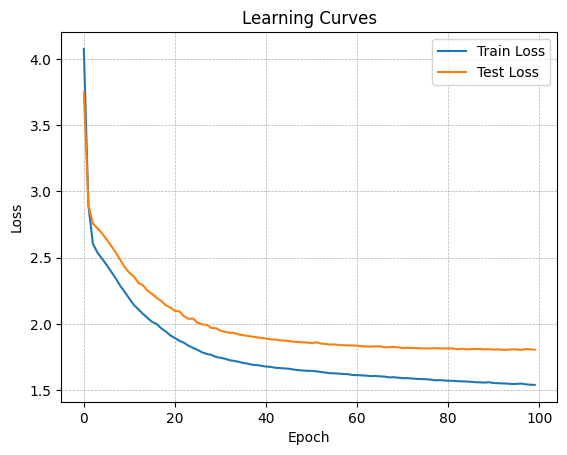

## **Part 4: Sampling from the Language Model**

In the fourth and final part, you will use your trained language model to generate new Pokemon names.

To generate names:

1. Start with a prime string and feed it through the model character by character using the `encode` function from `INF721Dataset` to create one-hot vectors.

2. For character generation:
   - Apply [`torch.nn.functional.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html) to the model output to get probabilities
   - Use [`torch.multinomial`](https://pytorch.org/docs/stable/generated/torch.multinomial.html) for sampling the next character index
   - Convert the index back to a character using the `decode` function

3. Generation loop:
   - Continue generating characters until you encounter the end token `"]"`
   - Feed each generated character back as input for the next prediction
   - Collect all generated characters to form the final name

Parameters to use:
- Prime string: starting sequence for generation
- Temperature: controls randomness in generation (if implemented)
- Model should be in evaluation mode during generation

In [ ]:
def generate(model, text_dataset, prime="["):
  """
  Generate a pokemon name with a given model and a prime sequence

  Arguments:
  - model (torch.nn.Module): A trained language model to sample names from.
  - text_dataset (torch.utils.data.Dataset): A language model dataset to access to encode/decode pokemon names
  - prime (str): A prime sequence to start the generation process.

  Returns:
  - pokemon_name (str): a pokemon generated name.
  """
  model.eval()
  pass

In [ ]:
torch.manual_seed(1)

# Load trained model
model = INF721RNNLanguageModel(train_dataset.vocab_size, hidden_size=50)
model.load_state_dict(torch.load('inf721net.pth'))

n_pokemons = 10
for i in range(n_pokemons):
  p = generate(model, train_dataset)
  print(p)

**Expected result**:
<table>
    <tr>
        <td> [Mamperer]</td>
    </tr>
    <tr>
        <td> [Viitindy]</td>
    </tr>
    <tr>
        <td> [Wonavoraro]</td>
    </tr>
    <tr>
        <td> [Dytlecan]</td>
    </tr>
    <tr>
        <td> [Sninourl]</td>
    </tr>
    <tr>
        <td> [Hootol]</td>
    </tr>
    <tr>
        <td> [Santak]</td>
    </tr>     
    <tr>
        <td> [Parory]</td>
    </tr>
    <tr>
        <td> [heix]</td>
    </tr>   
    <tr>
        <td> [Pogoscorm]</td>
    </tr>                    
</table>

Congratulations! Your language model is ready to generate new Pokemon!

## **Part 6: Generate your own Pokemon**

Use the generate function to create a list of Pokemon names. When you find a name you like, use the Bing Image Generator to illustrate your new Pokemon:

https://www.bing.com/create

Tip: use a prompt like "Generate a fake pokemon named [POKEMON_NAME] in the style of the [GENERATION NUMBER] generation."

Expected Result:

Generate a fake pokemon named Heix in the style of the 1st generation.

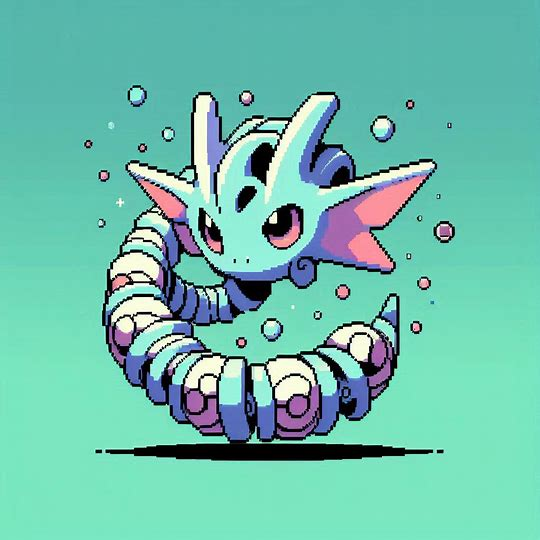

## **Part 6: Challenge (Optional)**

Create an LSTM or a GRU network to build a character-level language model to generate novels like Machado de Assis. You will have access to the training and validation sets, but not to the test set. The model with lower error on the test set will get 1 extra point! You can try any idea we've seen in the course so far to build your model. Report the results with a plot containing the training and validation learning curves, as you did before with the pokemon dataset. Also show the results of some generated novel you were able to produce with your model.

In [ ]:
!wget -O 'machado_train.txt' 'https://ufv-inf721-2024-2.lucasnferreira.com/assets/datasets/pa4/train.txt'
!wget -O 'machado_valid.txt' 'https://ufv-inf721-2024-2.lucasnferreira.com/assets/datasets/pa4/validation.txt'

--2025-05-07 11:51:54--  https://ufv-inf721-2024-2.lucasnferreira.com/assets/datasets/pa4/train.txt
Resolving ufv-inf721-2024-2.lucasnferreira.com (ufv-inf721-2024-2.lucasnferreira.com)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to ufv-inf721-2024-2.lucasnferreira.com (ufv-inf721-2024-2.lucasnferreira.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819584 (1.7M) [text/plain]
Saving to: ‘machado_train.txt’

machado_train.txt   100%[===================>]   1.73M  6.17MB/s    in 0.3s    

2025-05-07 11:52:04 (6.17 MB/s) - ‘machado_train.txt’ saved [1819584/1819584]

--2025-05-07 11:52:04--  https://ufv-inf721-2024-2.lucasnferreira.com/assets/datasets/pa4/validation.txt
Resolving ufv-inf721-2024-2.lucasnferreira.com (ufv-inf721-2024-2.lucasnferreira.com)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to ufv-inf721-2024-2.lucasnferreira.com (ufv-inf721-2024-2.lucasnferreira.com)|185.199.111.153|:

In [ ]:
train_file_path = "machado_train.txt"
with open(train_file_path, 'r') as file:
  machado_train_text = file.read()

valid_file_path = "machado_valid.txt"
with open(valid_file_path, 'r') as file:
  machado_valid_text = file.read()

print(machado_train_text[:200])
print("----")
print(machado_valid_text[0:200])

In [ ]:
class OptionalModel(torch.nn.Module):
    def __init__(self):
        super(OptionalModel, self).__init__()
        pass

    def forward(self, x):
        pass

Explain your model: ...